# Evaluate XAI Methods

**Objective**: Use differents methods to explain a neural network prediction and evaluate each method.

**Dataset** : The data set consists of a total of 11 features. The target variable is a binary value indicating whether or not a cardiovascular disease is present in the subject.

**Model** : The objective is to predict whether or not individual has a cardiovascular disease. (L’objectif est de prédire si un individu souffre ou non d’une maladie cardiovasculaire.)

Age | Objective Feature | age | int (days)  
Height | Objective Feature | height | int (cm) |  
Weight | Objective Feature | weight | float (kg) |  
Gender | Objective Feature | gender | categorical code |  
Systolic blood pressure | Examination Feature | ap_hi | int |  
Diastolic blood pressure | Examination Feature | ap_lo | int |  
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
Smoking | Subjective Feature | smoke | binary |  
Alcohol intake | Subjective Feature | alco | binary |  
Physical activity | Subjective Feature | active | binary |  

In [18]:
!pip freeze | grep numpy

numpy==2.1.3


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("./cardio_train.csv", sep=";")
df_train = df_train.iloc[:,1:].astype(float)
df_train["age"] = df_train["age"] // 365
df_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,51.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,48.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,47.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0
69996,61.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
69997,52.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0
69998,61.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0


In [3]:
# sys and di bp are incorrect, max/min are inaccurate vals
# highest recorded BP according to NCBI NLM study was 370/360
# adjust values accordingly
for val in df_train['ap_hi']:
    if(val > 370 or val < 0):
        df_train['ap_hi'].replace(val, None, inplace=True)

for val in df_train['ap_lo']:
    if(val > 360 or val < 0):
        df_train['ap_lo'].replace(val, None, inplace=True)

df_train = df_train[~(df_train[['ap_lo','ap_hi']].isna()).any(axis=1)]
df_train

C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\1240772302.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['ap_hi'].replace(val, None, inplace=True)
C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\1240772302.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,51.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,48.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,47.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0
69996,61.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
69997,52.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0
69998,61.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0


In [4]:
df_train["cardio"].value_counts()

cardio
0.0    34854
1.0    34146
Name: count, dtype: int64

## Age vs Number of Subjects with heart disease

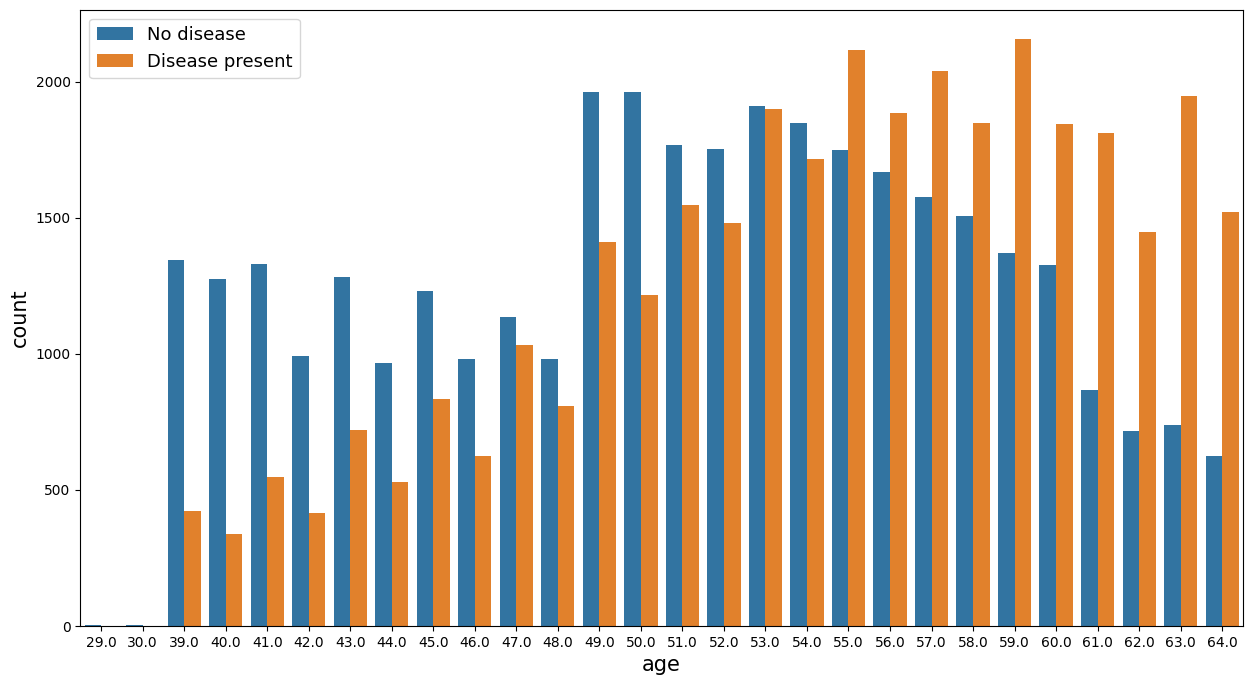

In [10]:
plt.figure(figsize=(15, 8))
sns.countplot(x='age', hue='cardio', data=df_train);

plt.ylabel('count', size=15)
plt.xlabel('age', size=15)

L = plt.legend(loc='upper left', prop={'size':13})
L.get_texts()[0].set_text('No disease')
L.get_texts()[1].set_text('Disease present')

In [11]:
# split data into subjects with/without cardiovascular disease
dis = df_train[df_train['cardio'] == 1] # subjects with disease
no_dis = df_train[df_train['cardio'] == 0] # subjects without disease

In [14]:
# group data by gender and cholesterol levels
# men with heart disease
dis_men_chol_1 = df_train[(df_train['gender'] == 2) & (df_train['cholesterol'] == 1)]
dis_men_chol_2 = df_train[(df_train['gender'] == 2) & (df_train['cholesterol'] == 2)]
dis_men_chol_3 = df_train[(df_train['gender'] == 2) & (df_train['cholesterol'] == 3)]

# women with heart disease
dis_women_chol_1 = df_train[(df_train['gender'] == 1) & (df_train['cholesterol'] == 1)]
dis_women_chol_2 = df_train[(df_train['gender'] == 1) & (df_train['cholesterol'] == 2)]
dis_women_chol_3 = df_train[(df_train['gender'] == 1) & (df_train['cholesterol'] == 3)]


# calculate means
men_chol_avgs = [ dis_men_chol_1['ap_hi'].mean(), dis_men_chol_2['ap_hi'].mean(), dis_men_chol_3['ap_hi'].mean() ]
women_chol_avgs = [ dis_women_chol_1['ap_hi'].mean(), dis_women_chol_2['ap_hi'].mean(), dis_women_chol_3['ap_hi'].mean() ]

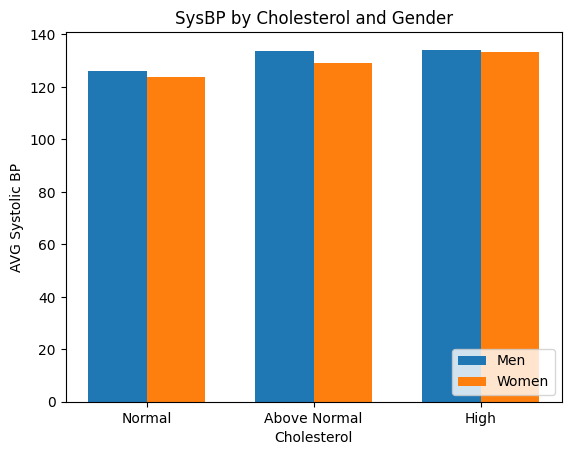

In [17]:
ind = np.arange(len(men_chol_avgs))
width = .35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_chol_avgs, width, label='Men')
rects2 = ax.bar(ind + width/2, women_chol_avgs, width, label='Women')

ax.set_ylabel('AVG Systolic BP')

ax.set_xlabel('Cholesterol')
ax.set_xticks(ind)
ax.set_xticklabels(('Normal', 'Above Normal', 'High'))

ax.legend(loc='lower right')
ax.set_title('SysBP by Cholesterol and Gender')
plt.show()

## Glucose in smokers vs non smokers

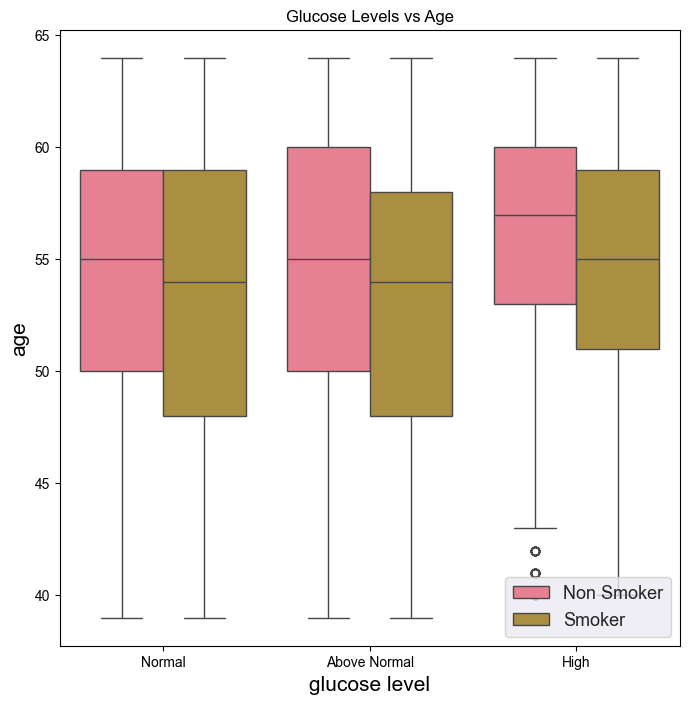

In [18]:
plt.figure(figsize=(8, 8))
plt.title('Glucose Levels vs Age')

sns.set(style="dark", palette="husl", color_codes=True)

sns.boxplot(x="gluc", y="age", hue="smoke", data=dis)
L = plt.legend(loc='lower right', prop={'size':13})
L.get_texts()[0].set_text('Non Smoker')
L.get_texts()[1].set_text('Smoker')

plt.ylabel('age', size=15)
plt.xlabel('glucose level', size=15)

plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'High'])
plt.show()

## BP and Cholesterol distributions in individuals who are healthy vs individuals with disease

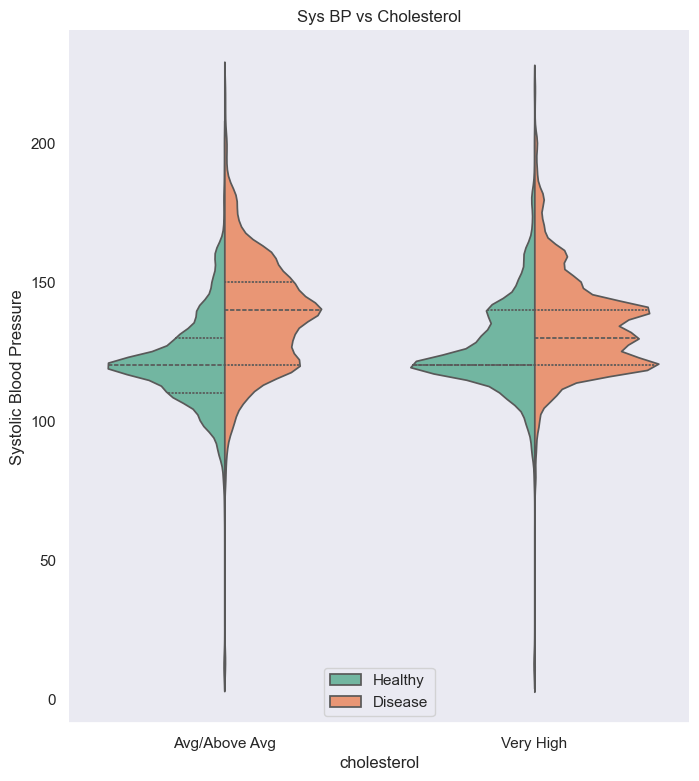

In [19]:
df_high_chol = df_train[(df_train['cholesterol'] > 1) & (df_train['gluc'] > 1)]

plt.figure(figsize=(8,9))

sns.set(style="dark", palette="Set2", color_codes=True)

sns.violinplot(x="cholesterol", y="ap_hi", hue="cardio", split=True, inner="quart", data=df_high_chol)

plt.xticks([0, 1], ['Avg/Above Avg', 'Very High'])
plt.ylabel('Systolic Blood Pressure')

L = plt.legend(loc='lower center')
L.get_texts()[0].set_text('Healthy')
L.get_texts()[1].set_text('Disease')

plt.title('Sys BP vs Cholesterol')

sns.despine(left=True)

<Figure size 1000x1000 with 0 Axes>

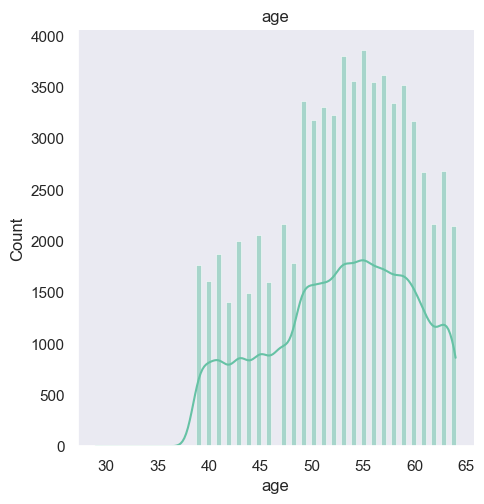

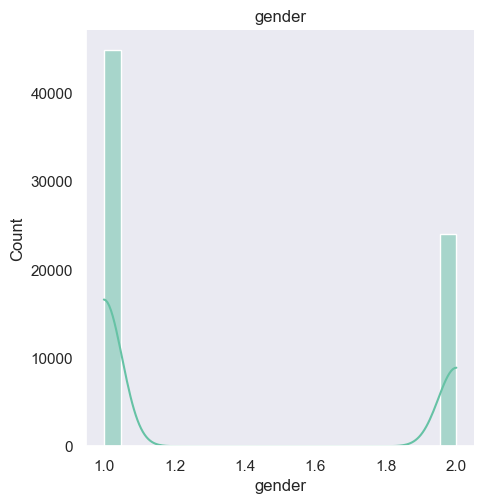

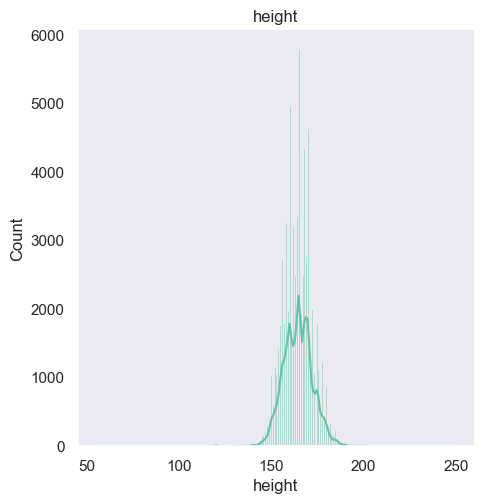

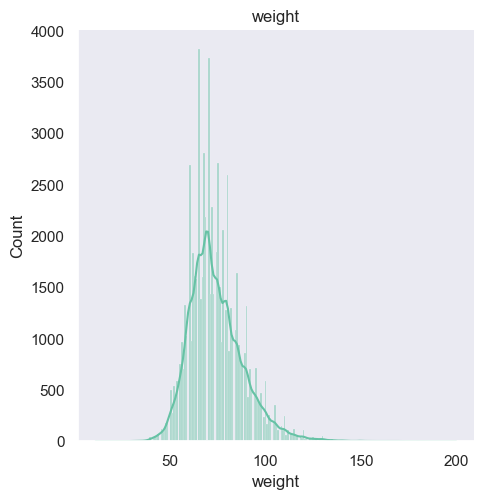

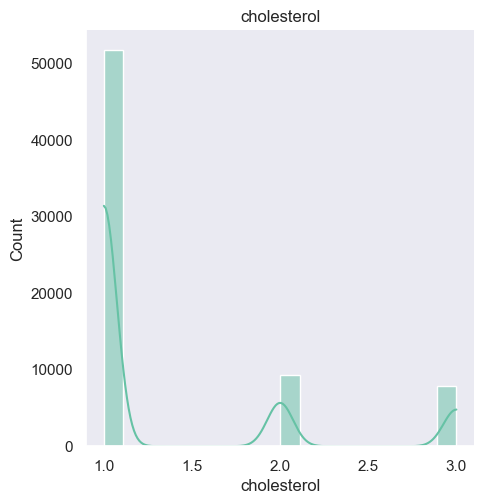

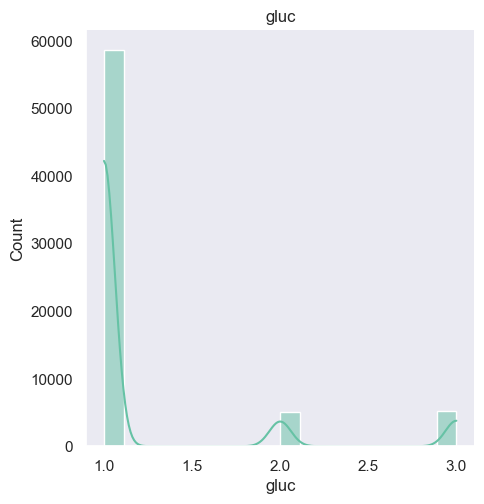

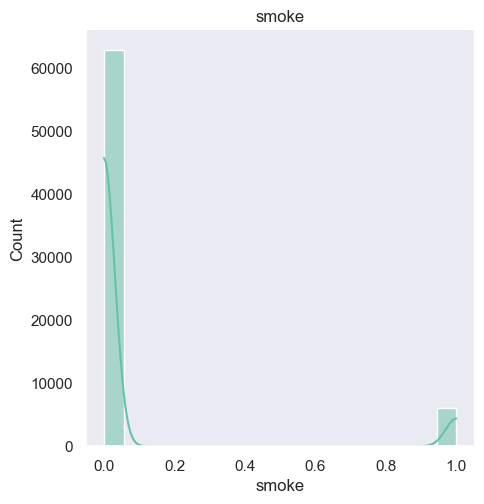

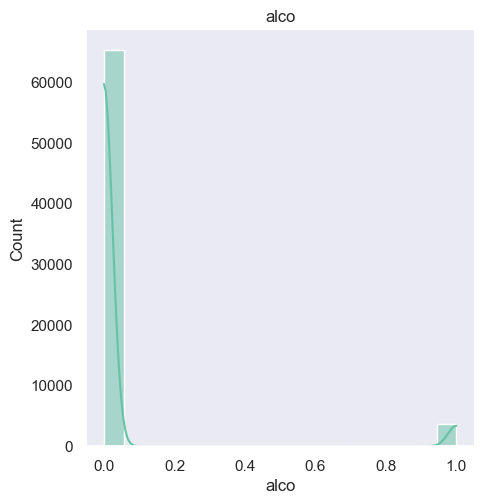

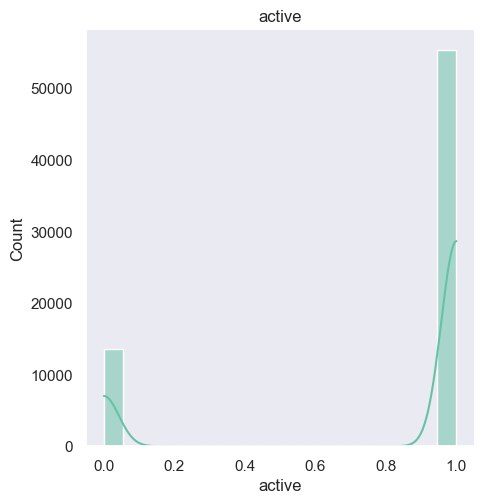

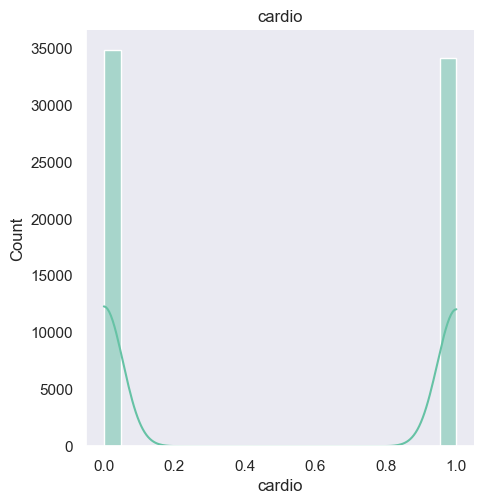

In [25]:
plt.figure(figsize=(10,10))
for col in df_train.select_dtypes('float'):
    sns.displot(df_train[col],kde=True)
    plt.title(col)
plt.show()

# Dataset repartition

In [34]:
X = df_train.drop('cardio', axis=1).values
y = df_train['cardio'].values

## Normalize data

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled[0]

array([-0.41757186,  1.36664232,  0.44371084, -0.84574121, -0.92119432,
       -0.13493116, -0.53688212, -0.39498646, -0.31037788, -0.2379689 ,
        0.49485417])

<Figure size 1000x1000 with 0 Axes>

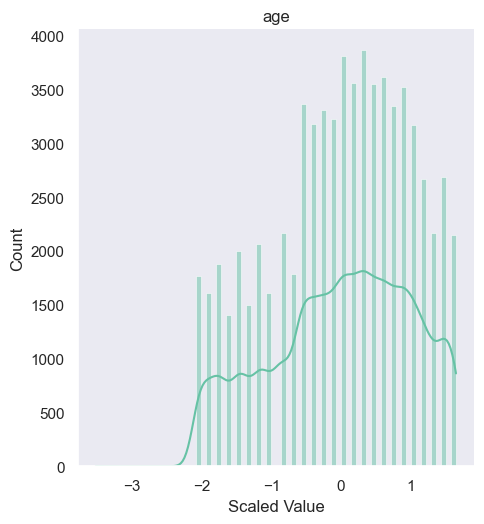

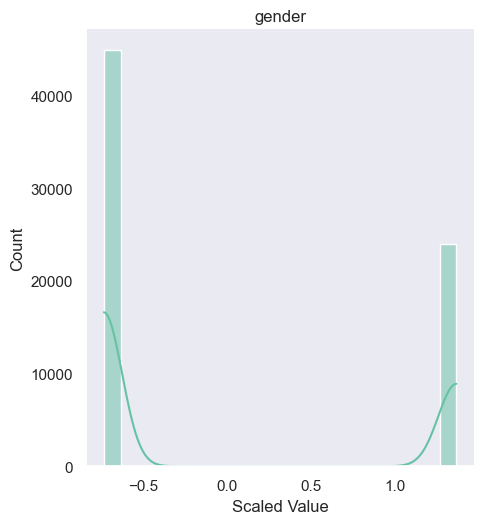

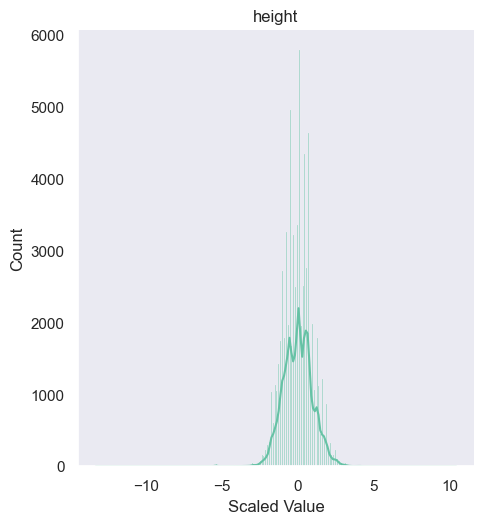

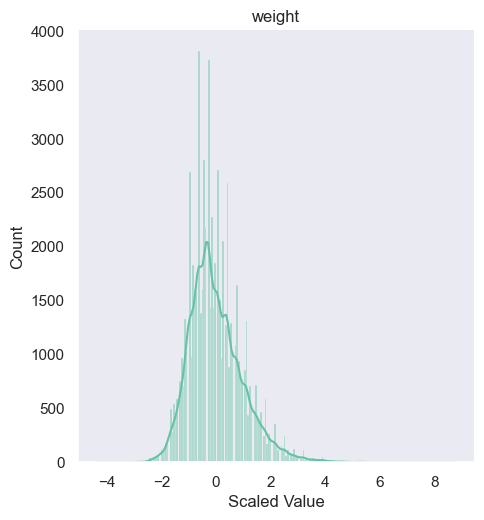

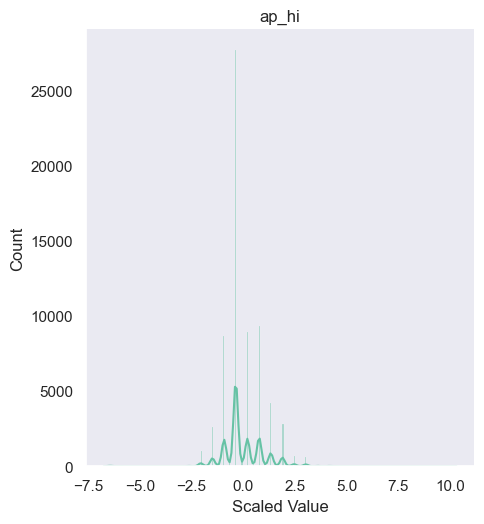

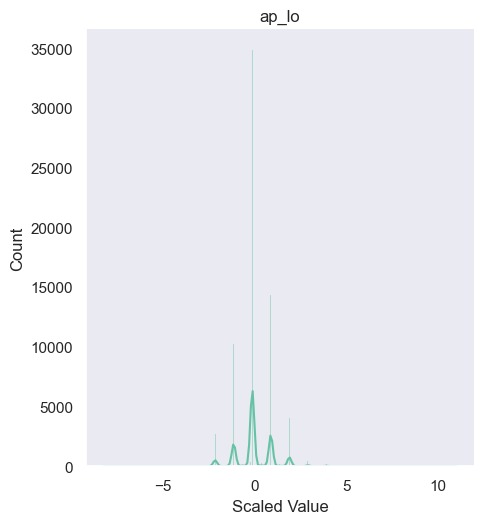

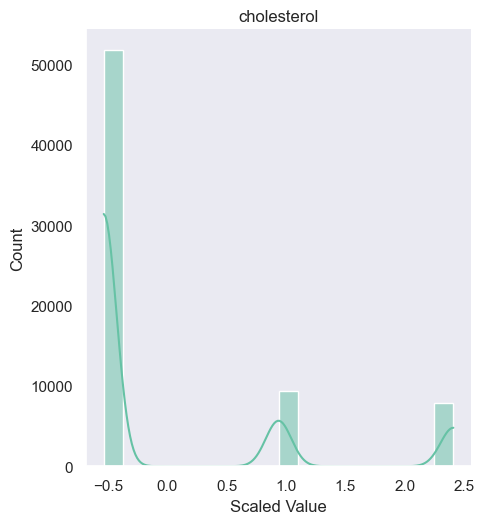

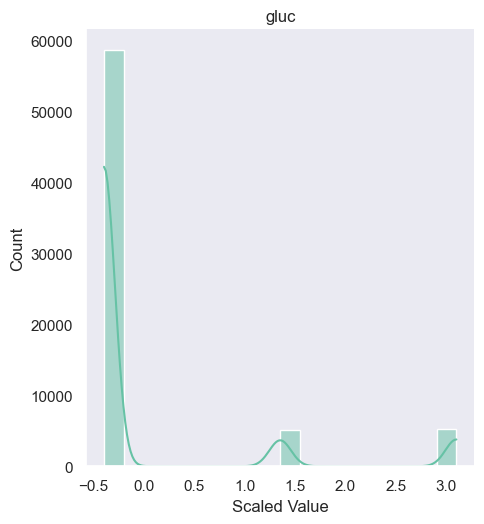

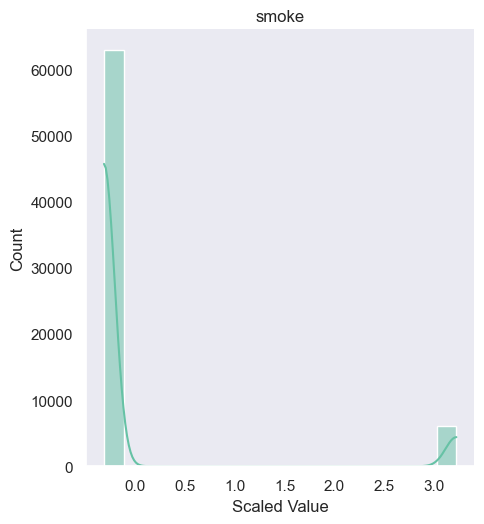

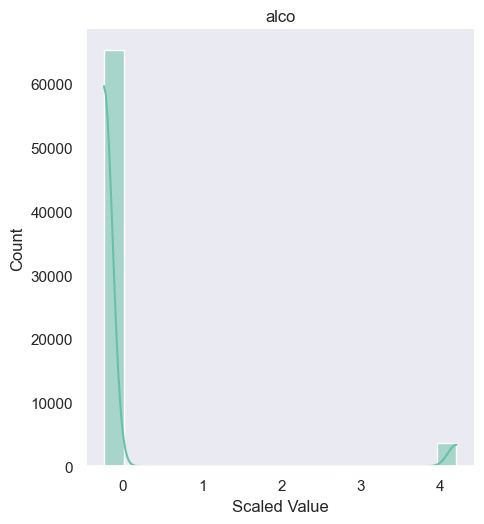

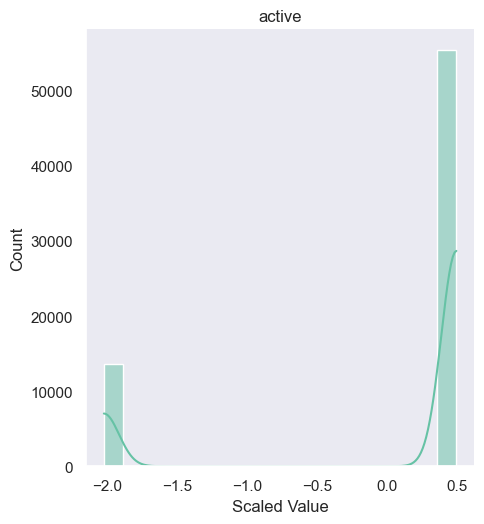

In [37]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df_train.columns[:11]):
    sns.displot(X_scaled[:, i], kde=True)
    plt.title(feature)
    plt.xlabel("Scaled Value")
plt.show()

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [43]:
print(f"Train items: {y_train.shape[0]}, Test items: {y_test.shape[0]}")

Train items: 55200, Test items: 13800


# Model - Define Neural Network

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class CardioNetwork(nn.Module):
    def __init__(self):
        super(CardioNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(11, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [73]:
model = CardioNetwork()

In [74]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

batch_size = 32
epochs = 20

# DataLoaders for training and validation
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = model.to(device)

criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss / len(train_loader):.4f}")

# Validating the model
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()
        
        predicted = (y_pred >= 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    print(f"Validation Loss: {test_loss / len(test_loader):.4f}")
    print(f"Validation Accuracy: {correct / total:.4f}")

Using device: cuda


C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\482256459.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\482256459.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\482256459.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
C:\Use

Epoch 1/20, Training Loss: 0.5610
Epoch 2/20, Training Loss: 0.5483
Epoch 3/20, Training Loss: 0.5466
Epoch 4/20, Training Loss: 0.5454
Epoch 5/20, Training Loss: 0.5445
Epoch 6/20, Training Loss: 0.5437
Epoch 7/20, Training Loss: 0.5431
Epoch 8/20, Training Loss: 0.5428
Epoch 9/20, Training Loss: 0.5427
Epoch 10/20, Training Loss: 0.5423
Epoch 11/20, Training Loss: 0.5419
Epoch 12/20, Training Loss: 0.5415
Epoch 13/20, Training Loss: 0.5413
Epoch 14/20, Training Loss: 0.5412
Epoch 15/20, Training Loss: 0.5407
Epoch 16/20, Training Loss: 0.5405
Epoch 17/20, Training Loss: 0.5403
Epoch 18/20, Training Loss: 0.5397
Epoch 19/20, Training Loss: 0.5395
Epoch 20/20, Training Loss: 0.5392
Validation Loss: 0.5366
Validation Accuracy: 0.7388


In [61]:
X_scaled[0].shape

(11,)

In [69]:
model.to("cpu")
model(torch.tensor(X_train[0].cpu(), dtype=torch.float32))

C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\1940616786.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(X_train[0].cpu(), dtype=torch.float32))


tensor([0.2786], grad_fn=<SigmoidBackward0>)

In [77]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import classification_report

# Initialize variables to store true labels and predicted probabilities
y_true = []
y_pred = []
y_pred_prob = []

# Set model to evaluation mode
model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Forward pass: Get raw predictions (before thresholding)
        y_pred_raw = model(X_batch)
        
        # Convert raw predictions to binary (0 or 1)
        y_pred_class = (y_pred_raw >= 0.5).float()  # Thresholding at 0.5

        # Collect true labels and binary predictions
        y_true.extend(y_batch.cpu().numpy())
        y_pred_prob.extend(y_pred_raw.cpu().numpy())
        y_pred.extend(y_pred_class.cpu().numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Generate the classification report
report = classification_report(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred_prob)
print(f"AUC Score: {auc_score:.4f}")
print(report)

AUC Score: 0.8055
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      6948
         1.0       0.76      0.70      0.73      6852

    accuracy                           0.74     13800
   macro avg       0.74      0.74      0.74     13800
weighted avg       0.74      0.74      0.74     13800



In [84]:
torch.save(model.state_dict(), 'model.pth')

# Explainability

In [100]:
model.to("cpu")
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to("cpu"), y_batch.to("cpu")
        y_pred_raw = model(X_batch)
        for idx, pred in enumerate(y_pred_raw):
            if pred >= y_batch[idx] - 0.1 and y_batch[idx] > 0.5:
# y_pred = model(torch.tensor(X_train[60].cpu(), dtype=torch.float32))
                print(X_batch[idx])
                print(f"Label: {y_batch[idx].cpu().item()}, Pred: {pred.item()}")

tensor([-0.5653,  1.3666,  2.2721,  0.3407,  1.3359,  0.8775, -0.5369, -0.3950,
         3.2219, -0.2380,  0.4949])
Label: 1.0, Pred: 0.9012071490287781
tensor([ 0.0256,  1.3666, -0.5314, -0.0780,  2.4645,  1.8899,  2.4100,  1.3539,
        -0.3104,  4.2022,  0.4949])
Label: 1.0, Pred: 0.9229617118835449
tensor([-0.2699,  1.3666,  1.7845, -0.2874,  1.9002,  0.8775, -0.5369, -0.3950,
         3.2219, -0.2380,  0.4949])
Label: 1.0, Pred: 0.9079923629760742
tensor([ 1.5028,  1.3666,  1.4188,  1.3876,  1.9002,  2.9022,  2.4100,  3.1027,
        -0.3104,  4.2022,  0.4949])
Label: 1.0, Pred: 0.9279788732528687
tensor([ 1.3551,  1.3666,  0.4437, -0.2176,  4.1573,  1.8899, -0.5369, -0.3950,
         3.2219, -0.2380, -2.0208])
Label: 1.0, Pred: 0.9067496061325073
tensor([-0.5653,  1.3666,  1.2969,  3.8302,  2.4645,  1.8899, -0.5369, -0.3950,
        -0.3104, -0.2380, -2.0208])
Label: 1.0, Pred: 0.9008538722991943
tensor([-1.1562,  1.3666,  1.9064,  2.8532,  4.7216,  2.9022,  0.9365, -0.3950,
  

In [101]:
features = torch.tensor([ 1.5028,  1.3666,  1.4188,  1.3876,  1.9002,  2.9022,  2.4100,  3.1027,
        -0.3104,  4.2022,  0.4949])

In [104]:
from captum.attr import DeepLift
from captum.attr import visualization as viz

In [113]:
deep_lift = DeepLift(model)
features = torch.tensor([ 1.5028,  1.3666,  1.4188,  1.3876,  1.9002,  2.9022,  2.4100,  3.1027,
        -0.3104,  4.2022,  0.4949]).unsqueeze(0)
attributions, delta = deep_lift.attribute(features, target=0, return_convergence_delta=True)

C:\Users\adrie\anaconda3\envs\python3.11\Lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
C:\Users\adrie\anaconda3\envs\python3.11\Lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


In [149]:
attributions.detach().numpy().squeeze()

array([-0.02563102,  0.02607733, -0.01846252, -0.04067764,  0.237462  ,
        0.09212389,  0.01060671,  0.05142416,  0.00136824,  0.16194876,
        0.00993334], dtype=float32)

array([ 4,  9,  5,  7,  1,  6, 10,  8,  2,  0,  3])

In [217]:
original_features = scaler.inverse_transform(features).squeeze()
sorted_indices_desc = np.argsort(attributions.detach().numpy().squeeze())[::-1]
for indice in sorted_indices_desc:
    score = attributions.detach().numpy().squeeze()[indice]
    if score > 0:
        print(f"{df_train.columns[indice]}: {original_features[indice]} ({score})")

ap_hi: 159.99995164877365 (0.23746199905872345)
alco: 0.9999932966902649 (0.16194875538349152)
ap_lo: 109.99959158781411 (0.09212388843297958)
gluc: 2.9999932024658875 (0.051424164324998856)
gender: 1.999979848800519 (0.026077328249812126)
cholesterol: 3.000021061365749 (0.010606713593006134)
active: 1.0000182115301737 (0.009933335706591606)
smoke: -6.264295752470006e-06 (0.0013682384742423892)


In [119]:
df_train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [120]:
scaler.inverse_transform(features)

array([[ 6.29999614e+01,  1.99997985e+00,  1.75999789e+02,
         9.40004860e+01,  1.59999952e+02,  1.09999592e+02,
         3.00002106e+00,  2.99999320e+00, -6.26429575e-06,
         9.99993297e-01,  1.00001821e+00]])

In [153]:
from lime.lime_tabular import LimeTabularExplainer

In [161]:
X_train.cpu()[0].shape

torch.Size([11])

In [162]:
explainer = LimeTabularExplainer(
    training_data=X_train.cpu().numpy(),  # The training dataset (should be in same format as X_patient)
    feature_names=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
    class_names=['No Disease', 'Cardiovascular Disease'],  # Replace with your actual class names
    mode='classification',  # Since it's a classification problem
    training_labels=y_train.cpu().numpy(),  # Your training labels (0 or 1)
)

In [167]:
features.numpy().squeeze()

array([ 1.5028,  1.3666,  1.4188,  1.3876,  1.9002,  2.9022,  2.41  ,
        3.1027, -0.3104,  4.2022,  0.4949], dtype=float32)

In [199]:
model_predict(features)

C:\Users\adrie\AppData\Local\Temp\ipykernel_17720\70162557.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features = torch.tensor(features, dtype=torch.float32)


array([[0.07202238],
       [0.9279776 ]], dtype=float32)

In [214]:
def model_predict(features):
    features = torch.tensor(features, dtype=torch.float32)
    y_pred = model(features).detach().numpy()  # Get model outputs (probabilities of class 1)
    prob_class_1 = y_pred[:, 0]  # Extract probability for class 1
    prob_class_0 = 1 - prob_class_1  # Compute probability for class 0
    return np.column_stack((prob_class_0, prob_class_1))  # Return probabilities for both classes

explanation = explainer.explain_instance(
    features.numpy().squeeze(),
    model_predict,  # The model's prediction function
    num_features=15  # Number of features to include in the explanation
)

In [215]:
explanation.show_in_notebook()

In [223]:
ranked_lime_attr = []
for col in df_train.columns:
    for attr, score in explanation.as_list():
        if col in attr:
            ranked_lime_attr.append(score)
ranked_lime_attr

[0.11391821371634628,
 -0.0004220461361344998,
 -0.016637477843186706,
 0.06259649415245545,
 0.3451145471854805,
 0.10286979986211743,
 0.22832056966014164,
 -0.010737111010519718,
 0.03322135773478297,
 -0.025578755865240495,
 -0.13729958189248687]

In [224]:
original_features = scaler.inverse_transform(features).squeeze()
sorted_indices_desc = np.argsort(ranked_lime_attr)[::-1]
for indice in sorted_indices_desc:
    score = ranked_lime_attr[indice]
    if score > 0:
        print(f"{df_train.columns[indice]}: {original_features[indice]} ({score})")

ap_hi: 159.99995164877365 (0.3451145471854805)
cholesterol: 3.000021061365749 (0.22832056966014164)
age: 62.999961399001606 (0.11391821371634628)
ap_lo: 109.99959158781411 (0.10286979986211743)
weight: 94.00048599441348 (0.06259649415245545)
smoke: -6.264295752470006e-06 (0.03322135773478297)


In [216]:
from scipy.stats import kendalltau, spearmanr

lime_attributions = np.array([score for exp, score in explanation.as_list()])
deeplift_attributions = attributions.detach().numpy().squeeze()

# Rank the features based on their attributions (highest importance = highest rank)
deeplift_ranks = np.argsort(deeplift_attributions)[::-1]  # Sort descending to get the top ranked features
lime_ranks = np.argsort(lime_attributions)[::-1]  # Sort descending for LIME

# Calculate Kendall's Tau
kendall_corr, _ = kendalltau(deeplift_ranks, lime_ranks)
print(f"Kendall's Tau: {kendall_corr}")

# Calculate Spearman's Rank Correlation
spearman_corr, _ = spearmanr(deeplift_attributions, lime_attributions)
print(f"Spearman's Rank Correlation: {spearman_corr}")

Kendall's Tau: 0.0909090909090909
Spearman's Rank Correlation: -0.10909090909090911
